# Project: Investigate a Dataset - [Medical Appointment No Shows]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

#### Dataset Variables

- **PatientId**: Identification of a patient


- **AppointmentID**: Identification of each appointment


- **Gender**: Male or Female . Female is the greater proportion, woman takes way more care of they health in comparison to man.


- **ScheduledDay**: The day of the actuall appointment, when they have to visit the doctor.


- **AppointmentDay**: The day someone called or registered the appointment, this is before appointment of course.


- **Age**: How old is the patient.


- **Neighbourhood**: Where the appointment takes place.


- **Scholarship**: True or False.
 
 
- **Hipertension**: True or False.


- **Diabetes**: True or False.


- **Alcoholism**: True or False.


- **Handcap**: True or False.


- **SMS_received**: True or False.
 

- **No-show**: True or False.


### Question(s) for Analysis
 - **What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### Importing The Dateset 

In [2]:
df = pd.read_csv('noshowappointments.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Investigating the data

In [3]:
df.shape #checking number of rows and columns in the dataset

(110527, 14)

The data has 110527 rows and 14 columns

In [4]:
df.info() #checking data types of the variables and if there is any missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [5]:
df.describe() #seeing some statistical information about the dataset

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [6]:
df.nunique() #checking number of unique values for each variable

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [7]:
df.duplicated(['PatientId','No-show']).sum() #number of patients in the dataset that have the same attending result
#we will need to drop the duplicates in order to have more accurate results

38710

In [8]:
df.duplicated().sum() #checking the number of duplicate rows in our dataset

0

The data has no duplicate rows 

In [9]:
df.isna().sum() #checking the number of NaN values in our dataset

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

The data has no missing values

### Checking unique values of columns

In [10]:
df['No-show'].unique()

array(['No', 'Yes'], dtype=object)

In [11]:
df['Gender'].unique() 

array(['F', 'M'], dtype=object)

In [12]:
df['Age'].unique() 

array([ 62,  56,   8,  76,  23,  39,  21,  19,  30,  29,  22,  28,  54,
        15,  50,  40,  46,   4,  13,  65,  45,  51,  32,  12,  61,  38,
        79,  18,  63,  64,  85,  59,  55,  71,  49,  78,  31,  58,  27,
         6,   2,  11,   7,   0,   3,   1,  69,  68,  60,  67,  36,  10,
        35,  20,  26,  34,  33,  16,  42,   5,  47,  17,  41,  44,  37,
        24,  66,  77,  81,  70,  53,  75,  73,  52,  74,  43,  89,  57,
        14,   9,  48,  83,  72,  25,  80,  87,  88,  84,  82,  90,  94,
        86,  91,  98,  92,  96,  93,  95,  97, 102, 115, 100,  99,  -1],
      dtype=int64)

In [13]:
df.query('Age < 0') #removing invalid input of age


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
df['Handcap'].unique() # we need to convert all the values > than 1 to 1 because they mean the same thing which they are handcap

array([0, 1, 2, 3, 4], dtype=int64)

In [15]:
df['Alcoholism'].unique()

array([0, 1], dtype=int64)

In [16]:
df['Diabetes'].unique()

array([0, 1], dtype=int64)

In [17]:
df['Hipertension'].unique()

array([1, 0], dtype=int64)

In [18]:
df['Scholarship'].unique()

array([0, 1], dtype=int64)

In [19]:
df.Handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64


### Data Cleaning


In [20]:
df.drop(index=99832, inplace=True)

In [21]:
df.rename(columns={'No-show':'no_show'}, inplace = True)#renaming columns for easier access
df.rename(columns = lambda x: x.lower(), inplace=True)#convering column names to lower case for consistency

In [22]:
df.drop_duplicates(['patientid','no_show'], inplace=True)#dropping the number of patients number of patients in the dataset that have the same attending result

In [23]:
df.columns
df.drop(['patientid','appointmentid','scheduledday','appointmentday'], axis=1, inplace=True) #dropping unwanted columns

In [24]:
df.columns #checking if the columns have been renamed 

Index(['gender', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no_show'],
      dtype='object')

In [25]:
df['handcap'] = df['handcap'].apply(lambda x: True if (x >= 1) else False) #converting all values that is 1 or more to True and 0 to False


In [26]:
df['no_show'] = df['no_show'].apply(lambda x: True if (x == 'Yes') else False)#converting all values that is 'Yes' True and 'No' to False

In [27]:
df['no_show'].unique() #checking if the values have been changed 

array([False,  True])

In [28]:
df['no_show'] = df['no_show'].astype(int) #converting all bool values to int True -> 1 , False -> 0

In [29]:
df['handcap'] = df['handcap'].astype(int) #converting all bool values to int True -> 1 , False -> 0

In [30]:
df.dtypes #checking variables data types after the change

gender           object
age               int64
neighbourhood    object
scholarship       int64
hipertension      int64
diabetes          int64
alcoholism        int64
handcap           int32
sms_received      int64
no_show           int32
dtype: object

The no_show column and handcap column have been changed successfully

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question  (What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?)

In [31]:
showed = df.no_show == 0 #getting the subset of data where the patient had showed
didnt_show = df.no_show == 1 #getting the subset of data where the patient didn't show

In [32]:
df.groupby(['no_show','gender']).mean() #Checking the mean of the variables grouped by the attendance and gender

age  scholarship  hipertension  diabetes  alcoholism  \
no_show gender                                                               
0       F       39.130292     0.115160      0.219765  0.078518    0.013558   
        M       33.766269     0.047934      0.172302  0.062575    0.041890   
1       F       36.065010     0.137146      0.183817  0.069181    0.020337   
        M       31.220400     0.054734      0.146825  0.057496    0.046451   

                 handcap  sms_received  
no_show gender                          
0       F       0.016276      0.307609  
        M       0.023863      0.278331  
1       F       0.013993      0.471059  
        M       0.019003      0.419522

In [33]:
df.groupby('sms_received').mean() #Checking the mean of the variables grouped by sms received

,age,scholarship,hipertension,diabetes,alcoholism,handcap,no_show
sms_received,,,,,,,
0,36.233711,0.095019,0.197330,0.074166,0.026217,0.020161,0.202444
1,37.109216,0.096560,0.190589,0.064608,0.022698,0.014233,0.332088


people who received an sms has a lower attendance rate than the one who didn't maybe there is a probelm in sms system

### Making a function to make bar plots

In [34]:
def plot_bar(data,col,showed,didnt_show,title,xlab,ylab):
    """
    plot a bar for a specific col in the dataset to compare people who showed vs. people who didn't
    
    parameters:
    
    data: the dataframe
    col: the specific column
    showed: the sample who showed
    didnt_show: the sample who didn't show
    title: the title you want to give to the plot
    xlab: the x-axis label you want to give to the plot
    ylab: the y-axis label you want to give to the plot
    
    """
    plt.figure(figsize=(16,20))
    data[col][showed].value_counts().sort_values(ascending=True).plot(kind='barh', alpha=0.5, color='blue', label='showed')
    data[col][didnt_show].value_counts().sort_values(ascending=True).plot(kind='barh', alpha=0.5, color='orange', label='didn\'t show')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid(True)
    plt.legend()
    plt.show();

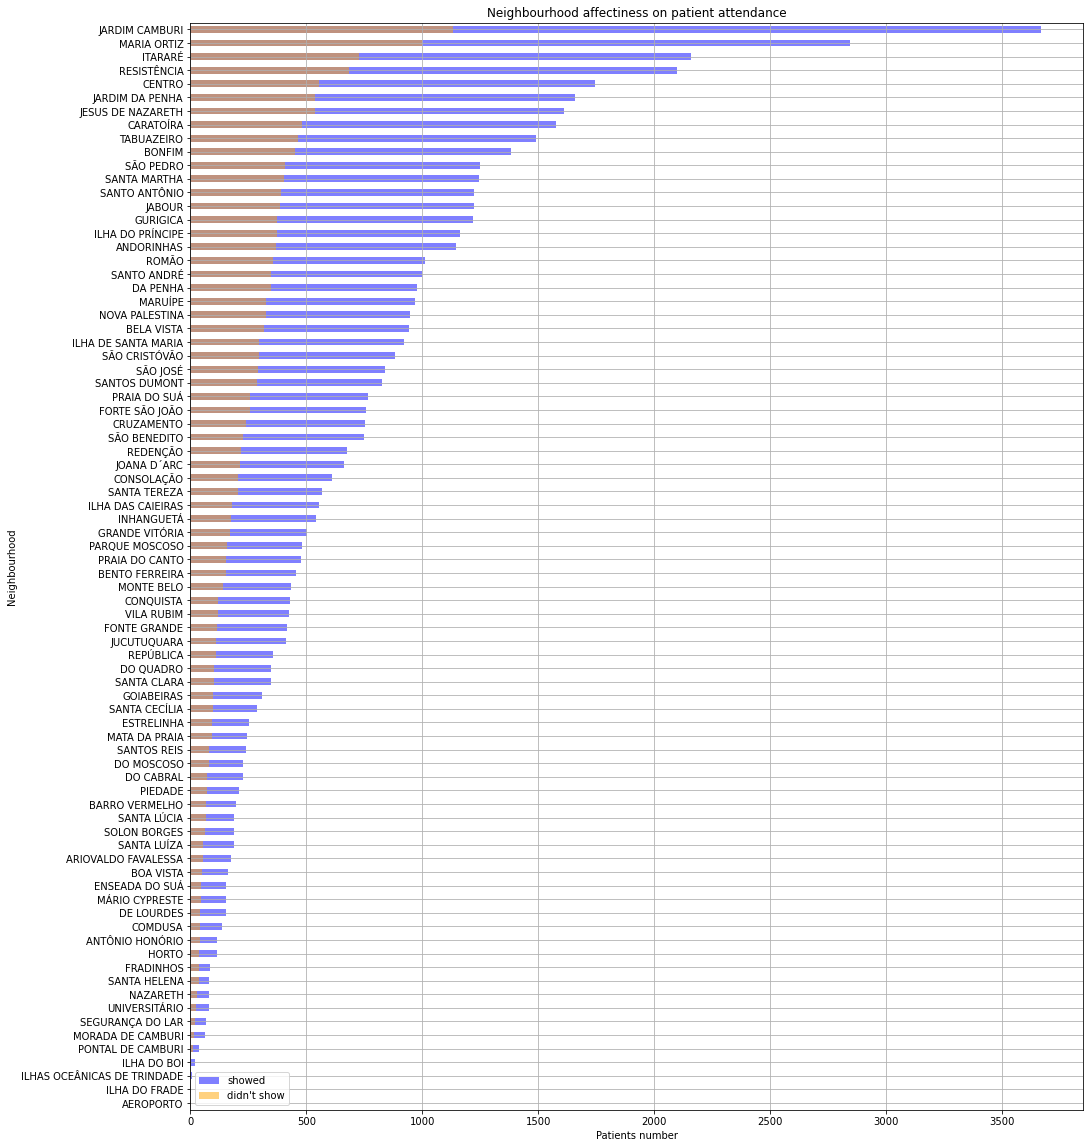

In [35]:
plot_bar(df,'neighbourhood',showed,didnt_show,'Neighbourhood affectiness on patient attendance',
         'Patients number','Neighbourhood')

As we can see that the neighbourhood has correlation of attending or not

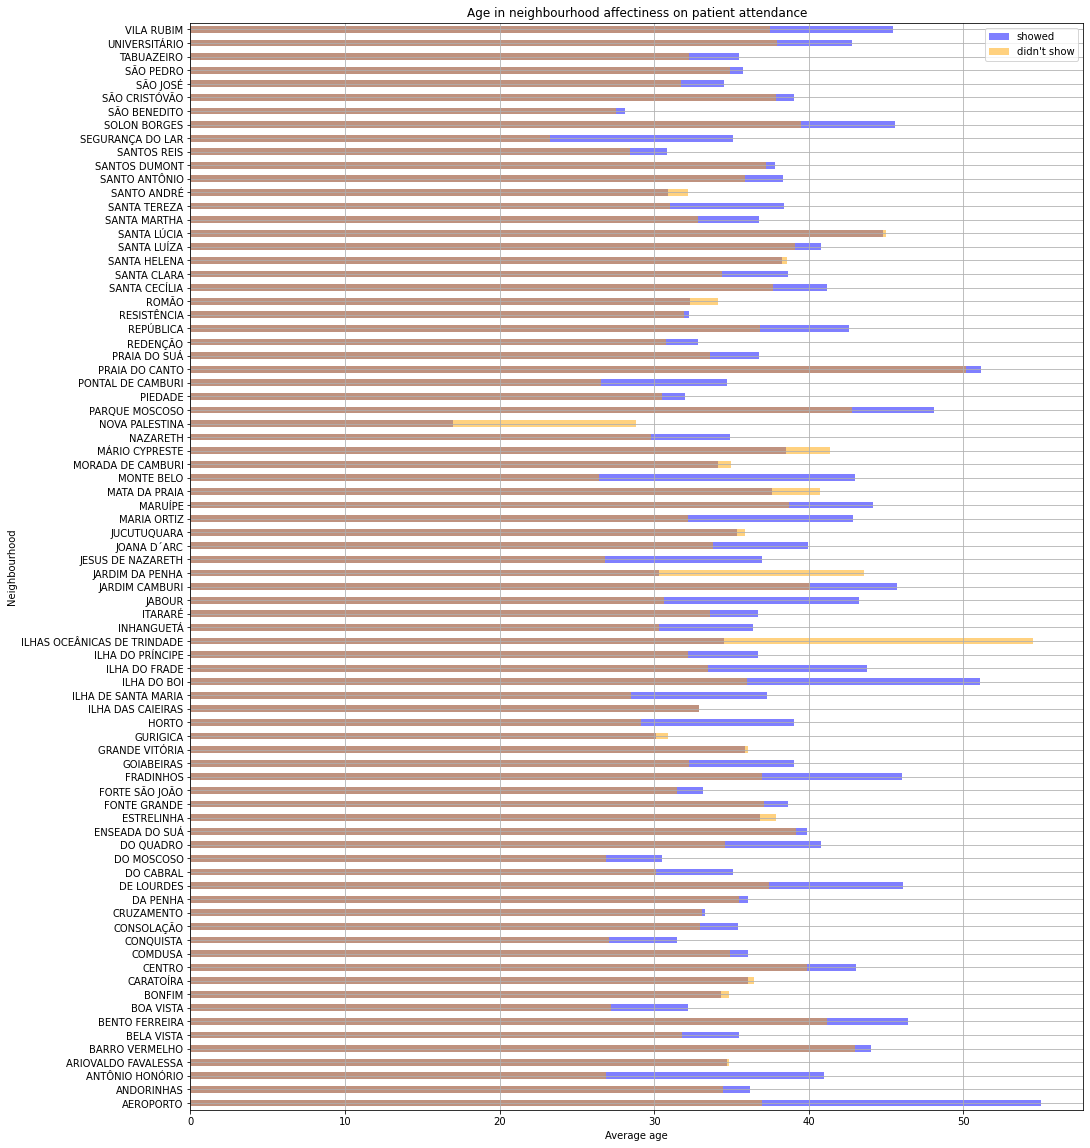

In [36]:
plt.figure(figsize=(16,20))
df[showed].groupby('neighbourhood').age.mean().plot(kind='barh', alpha=0.5, color='blue', label='showed');
df[didnt_show].groupby('neighbourhood').age.mean().plot(kind='barh', alpha=0.5, color='orange', label='didn\'t show')
plt.title('Age in neighbourhood affectiness on patient attendance')
plt.xlabel('Average age')
plt.ylabel('Neighbourhood')
plt.grid(True)
plt.legend()
plt.show();

### Making a function to make histogram plots

In [37]:
def plot_hist(data,col,showed,didnt_show,title,xlab,ylab):
    """
    plot a histogram for a specific col in the dataset to compare people who showed vs. people who didn't
    
    parameters:
    
    data: the dataframe
    col: the specific column
    showed: the sample who showed
    didnt_show: the sample who didn't show
    title: the title you want to give to the plot
    xlab: the x-axis label you want to give to the plot
    ylab: the y-axis label you want to give to the plot
    
    """
    plt.figure(figsize=(16,8))
    data[col][showed].hist(alpha=0.5, bins=25, label='showed', color='green');
    data[col][didnt_show].hist(alpha=0.5, bins=25, label='didn\'t show', color='yellow')
    plt.title(title)
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.grid(True)
    plt.legend()
    plt.show();

### Making a histogram of the different variables in order to see relations

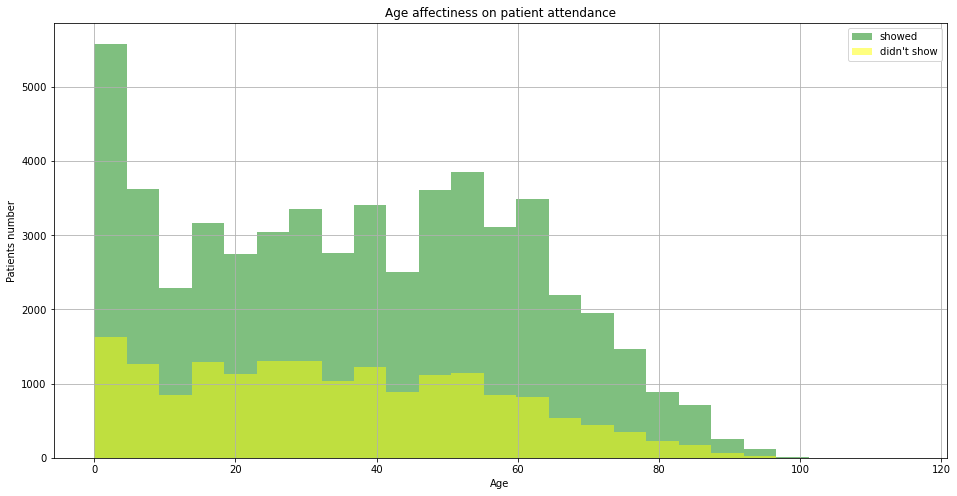

In [38]:
plot_hist(df,'age',showed,didnt_show,'Age affectiness on patient attendance','Age','Patients number')

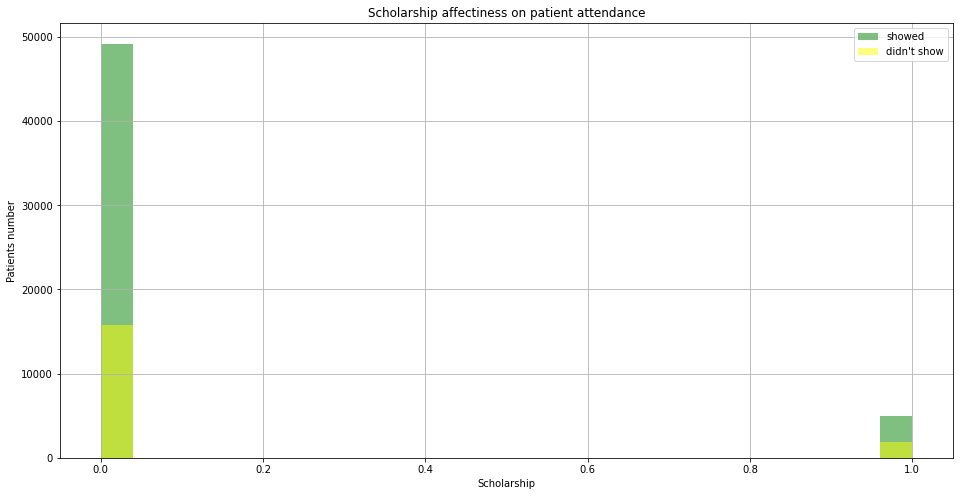

In [39]:
plot_hist(df,'scholarship',showed,didnt_show,'Scholarship affectiness on patient attendance','Scholarship','Patients number')

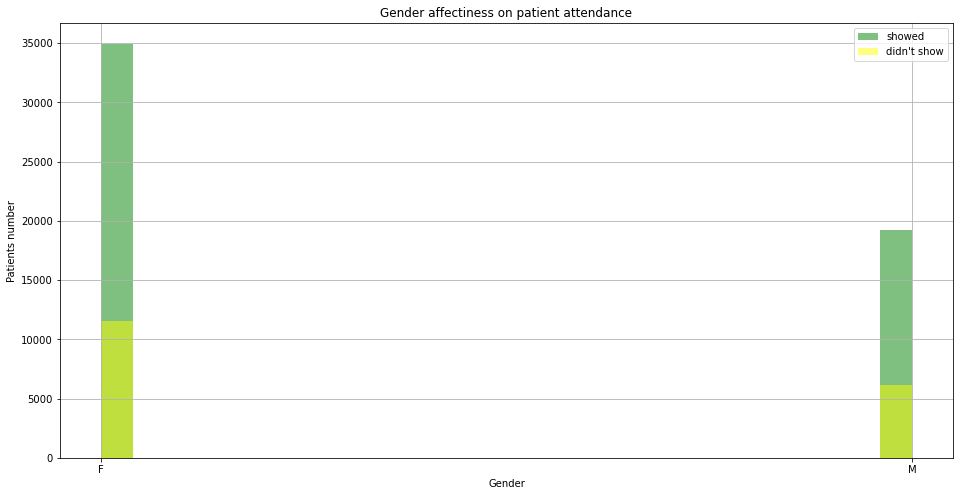

In [40]:
plot_hist(df,'gender',showed,didnt_show,'Gender affectiness on patient attendance','Gender','Patients number')

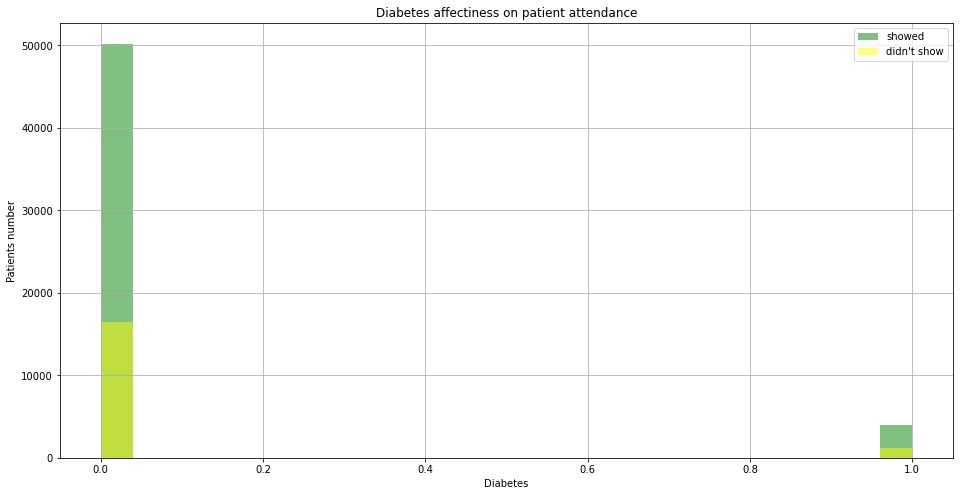

In [41]:
plot_hist(df,'diabetes',showed,didnt_show,'Diabetes affectiness on patient attendance','Diabetes','Patients number')

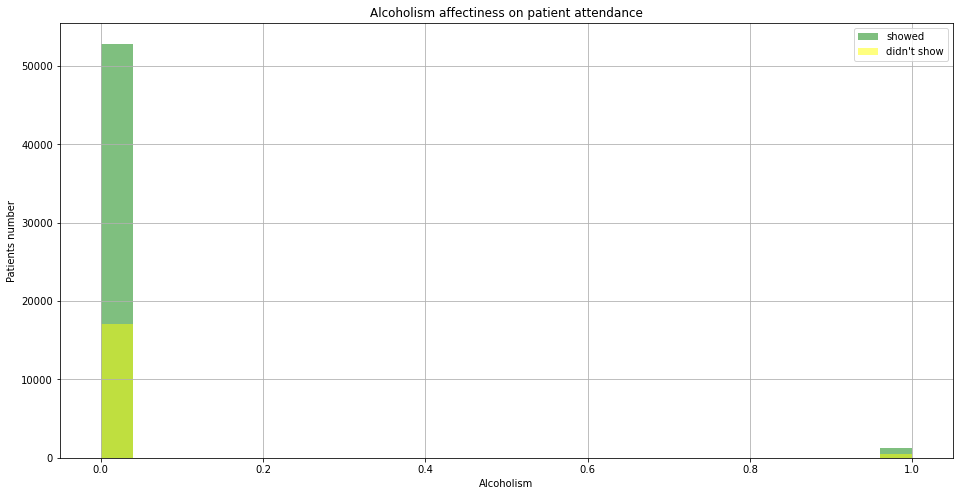

In [42]:
plot_hist(df,'alcoholism',showed,didnt_show,'Alcoholism affectiness on patient attendance','Alcoholism','Patients number')

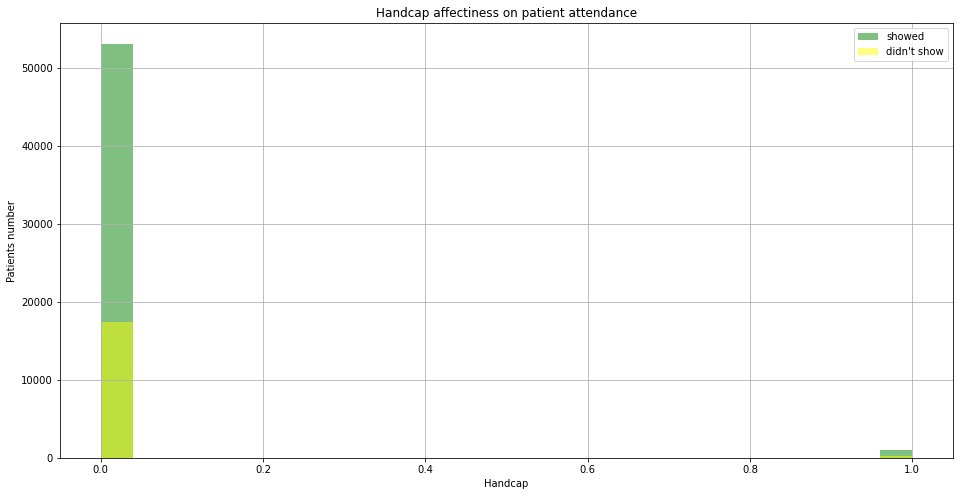

In [43]:
plot_hist(df,'handcap',showed,didnt_show,'Handcap affectiness on patient attendance','Handcap','Patients number')

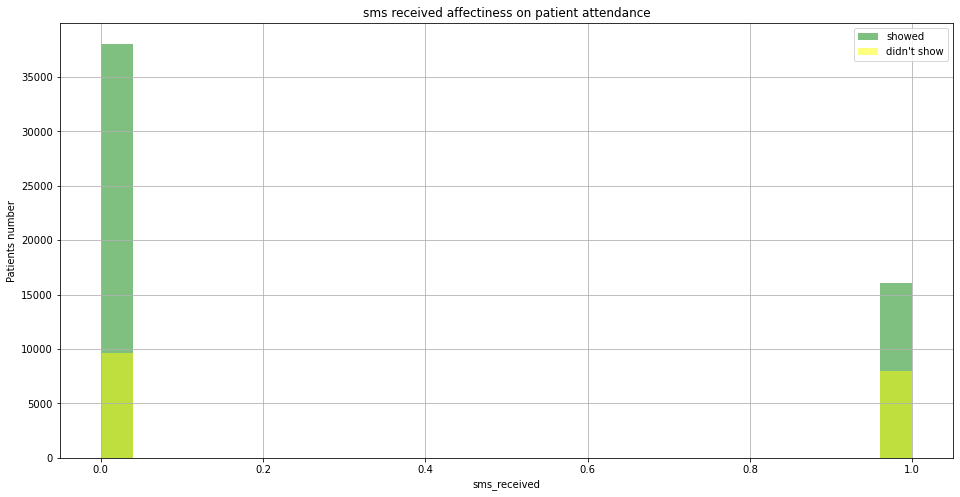

In [44]:
plot_hist(df,'sms_received',showed,didnt_show,'sms received affectiness on patient attendance','sms_received','Patients number')

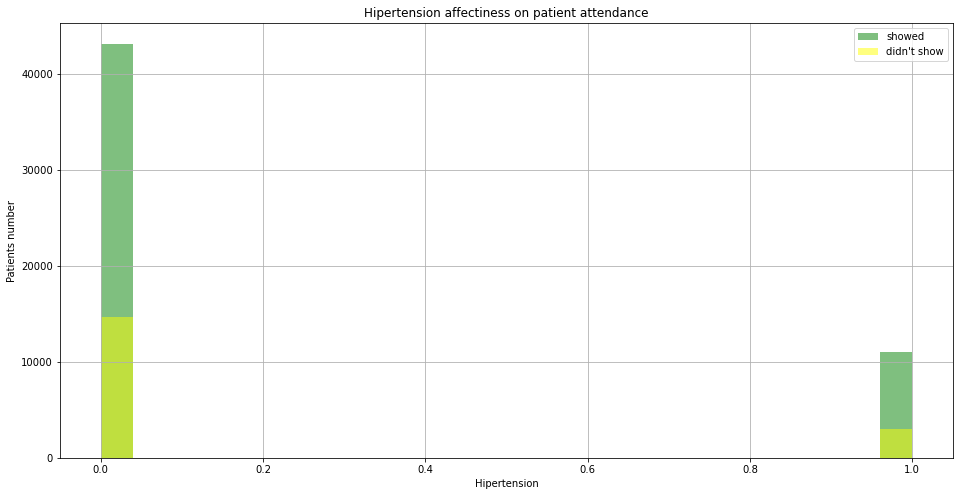

In [45]:
plot_hist(df,'hipertension',showed,didnt_show,'Hipertension affectiness on patient attendance','Hipertension','Patients number')

### Ploting a pie chart to see the difference of number between genders in the dataset

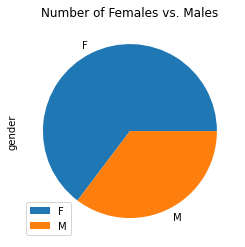

In [46]:
df.gender.value_counts().plot(kind='pie')
plt.legend();
plt.title('Number of Females vs. Males');

As we can see female patients are more than the males in this dataset

<a id='conclusions'></a>
## Conclusions

- **People who didnt recieve an sms has more attendance than the one who got one**
- **There is a correlation between the neighbourhood and patient attending and the most attending neighbourhood is JARDIM CAMBURI**
- **Maybe the most attending neighbourhood is close to the hospital and least attending are far from it (we cant be sure of that because we dont have the neighbourhood of the hospital)**
- **The most people attending between the age of (0-8) and then (51-65) and the least is (80-115)**
- **We cant assume that females attend more than males because the number of females in the dataset is almost the double of number of males**
- **Handcap people attend less than other people**

## Limitations

- **There is no direct correlation other than neighbourhood in the dateset to predict if a patient will show up for their scheduled appointment**